In [1]:
# Here we are importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [3]:
# Here we are uploading the csv file
df = pd.read_csv("TSLA.csv")

In [5]:
# Here we will see the top 5 of the dataset
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500


# Findings:
These are Tesla stock price dataset with various columns like high low volume

# Here we will see the bottom 5 of the dataset
df.tail()

In [7]:
# Here we will see the random of the dataset
df.sample()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
1484,1484,2016-05-20,14.466,14.703333,14.423333,14.685333,135106500


In [9]:
# Here we will get the idea of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3534 non-null   int64  
 1   Date        3534 non-null   object 
 2   Open        3534 non-null   float64
 3   High        3534 non-null   float64
 4   Low         3534 non-null   float64
 5   Close       3534 non-null   float64
 6   Volume      3534 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 193.4+ KB


# Findings 
Here on using the info function we get to see that dataset has no null values and all or most are float type of data

In [11]:
# Here we will see the describe function for our further study
df.describe()

,Unnamed: 0,Open,High,Low,Close,Volume
count,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3.534000e+03
mean,1766.500000,74.997811,76.642865,73.249666,74.985912,9.694511e+07
std,1020.322253,102.281381,104.556354,99.811577,102.217353,7.877581e+07
min,0.000000,1.076000,1.108667,0.998667,1.053333,1.777500e+06
25%,883.250000,11.448667,11.753834,11.191166,11.532334,4.749600e+07
50%,1766.500000,17.417334,17.645333,17.064000,17.400333,8.216325e+07
75%,2649.750000,159.177502,161.312500,153.632500,158.180004,1.228650e+08
max,3533.000000,411.470001,414.496674,405.666656,409.970001,9.140820e+08


# Findings:
By looking at the mean and standard deviation values, you can get a sense of the overall characteristics of your dataset. For example:

The mean Open price is around 75, with a standard deviation of around 102. This suggests that the Open prices are relatively volatile, with a wide range of values.
The mean Volume is around 9.7 million, with a standard deviation of around 7.9 million. This suggests that the trading volumes are relatively large, with a significant amount of variati


Z-Score

You can also use the mean and standard deviation values to calculate the z-score for each value in your dataset. The z-score is a measure of how many standard deviations away from the mean a value is.

For example, if you want to calculate the z-score for an Open price of 100, you can use the following formula:

z-score = (value - mean) / std = (100 - 74.997811) / 102.281381 = 0.25

This means that an Open price of 100 is 0.25 standard deviations above the mean.on.

In [13]:
# Now we will see columns
df.columns
    

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [15]:
# Here now we will see the correlation matrix
df_num = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Findings 
After see the corr function in the bore storing it in df_num i woul dsay there was positive corellation between thw columns

<Axes: >

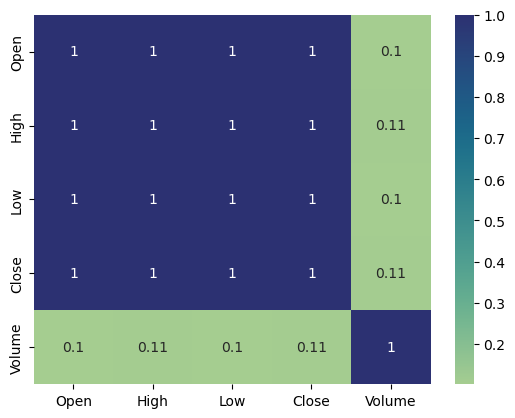

In [37]:
# Here now we will see the heatmap for the correalation to see it visually
sns.heatmap(df_num,cmap ="crest",annot = True)

# Findings
As we can see that only volume os the one with negative correlation as it is unpredeictable in nature

In [53]:
# Now we will split or data in dependent and non dependent variable
X =  df[['Open','High', 'Low','Volume']]
y =  df['Close'] 

In [55]:
# Now we will do is train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
# Here we are seeing the X_train
X_train

,Open,High,Low,Volume
1885,21.972668,22.249332,21.813999,65778000
2325,16.101334,16.132668,14.840667,193372500
1653,16.389999,16.726000,16.366667,93943500
1132,14.767333,15.233333,14.766667,49905000
1814,24.299334,24.584000,24.026667,89593500
...,...,...,...,...
1130,14.920667,14.954667,14.634667,67585500
1294,17.355333,17.376667,17.001333,54064500
860,7.958667,8.181333,7.740000,208282500
3507,175.350006,176.149994,172.130005,57953800


In [59]:
# Here we are seeing the y_test
y_test

325       1.840667
2226     17.002001
2480     52.172001
1862     21.003332
299       1.538000
           ...    
2689    199.316666
2440     43.021999
1566     13.693333
195       1.766000
532       2.016667
Name: Close, Length: 707, dtype: float64

In [61]:
# Here we will put the linear regression model in lr
lr = LinearRegression()

In [63]:
# Here we will fit the model in train and test split
lr.fit(X_train,y_train)

LinearRegression()

In [65]:
# Here we will predict the model in on X_test and store it in y_pred
y_pred = lr.predict(X_test)

In [67]:
# Now we will test the metrics
r2_score(y_pred,y_test)

0.9997000120542241

In [49]:
mean_absolute_error(y_test,y_pred)

0.7609893566190551

In [51]:
mean_squared_error(y_test,y_pred)

3.1849529076622787